<a href="https://colab.research.google.com/github/ItsBaiShiXi/MachineLearning_SongPopularity/blob/main/MachineLearning_SongPopularity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Collection

In [6]:
! pip install kaggle

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [9]:
! cp /content/drive/MyDrive/ColabNotebooks/kaggle.json ~/.kaggle/kaggle.json

In [10]:
! chmod 600 ~/.kaggle/kaggle.json

In [11]:
! kaggle datasets download joebeachcapital/top-10000-spotify-songs-1960-now

top-10000-spotify-songs-1960-now.zip: Skipping, found more recently modified local copy (use --force to force download)


In [12]:
!unzip -q /content/top-10000-spotify-songs-1960-now.zip -d /content/dataset_directory

replace /content/dataset_directory/top_10000_1960-now.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Imports

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [14]:
df = pd.read_csv("/content/dataset_directory/top_10000_1960-now.csv")
df = pd.DataFrame(df);
df

Track URI  \
0     spotify:track:1XAZlnVtthcDZt2NI1Dtxo   
1     spotify:track:6a8GbQIlV8HBUW3c6Uk9PH   
2     spotify:track:70XtWbcVZcpaOddJftMcVi   
3     spotify:track:1NXUWyPJk5kO6DQJ5t7bDu   
4     spotify:track:72WZtWs6V7uu3aMgMmEkYe   
...                                    ...   
9994  spotify:track:3kcKlOkQQEPVwxwljbGJ5p   
9995  spotify:track:5k9QrzJFDAp5cXVdzAi02f   
9996  spotify:track:5ydeCNaWDmFbu4zl0roPAH   
9997  spotify:track:0zKbDrEXKpnExhGQRe9dxt   
9998  spotify:track:3iKuIfvoU50eww6EVzNqHo   

                                             Track Name  \
0               Justified & Ancient - Stand by the Jams   
1                       I Know You Want Me (Calle Ocho)   
2                    From the Bottom of My Broken Heart   
3                      Apeman - 2014 Remastered Version   
4                    You Can't Always Get What You Want   
...                                                 ...   
9994                       Kernkraft 400 (A Better Day)   
9995                       Never Say Never - Radio Edit   
9996  Groovejet (If This Ain't Love) [feat. Sophie E...   
9997                                            Lay Low   
9998                                        Padam Padam   

                                          Artist URI(s)  \
0                 spotify:artist:6dYrdRlNZSKaVxYg5IrvCH   
1                 spotify:artist:0TnOYISbd1XYRBk9myaseg   
2                 spotify:artist:26dSoYclwsYLMAKD3tpOr4   
3                 spotify:artist:1SQRv42e4PjEYfPhS0Tk9E   
4                 spotify:artist:22bE4uQ6baNwSHPVcDxLCe   
...                                                 ...   
9994  spotify:artist:0u6GtibW46tFX7koQ6uNJZ, spotify...   
9995              spotify:artist:1ScZSjoYAihNNm9qlhzDnL   
9996  spotify:artist:4bmymFwDu9zLCiTRUmrewb, spotify...   
9997              spotify:artist:2o5jDhtHVPhrJdv3cEQ99Z   
9998              spotify:artist:4RVnAU35WRWra6OZ3CbbMA   

                    Artist Name(s)                             Album URI  \
0                          The KLF  spotify:album:4MC0ZjNtVP1nDD5lsLxFjc   
1                          Pitbull  spotify:album:5xLAcbvbSAlRtPXnKkggXA   
2                   Britney Spears  spotify:album:3WNxdumkSMGMJRhEgK80qx   
3                        The Kinks  spotify:album:6lL6HugNEN4Vlc8sj0Zcse   
4               The Rolling Stones  spotify:album:0c78nsgqX6VfniSNWIxwoD   
...                            ...                                   ...   
9994                    Topic, A7S  spotify:album:2NIChqkijGw4r4Dqfmg0A3   
9995                     Vandalism  spotify:album:2n506u3HKN3CaEDvAjv5Ct   
9996  Spiller, Sophie Ellis-Bextor  spotify:album:20Q3pGpYiyicF32x5L8ppH   
9997                        Tiësto  spotify:album:0EYKSXXTsON8ZA95BuCoXn   
9998                 Kylie Minogue  spotify:album:0OHc8STurn45gpk3dyIiw5   

                                             Album Name  \
0                                      Songs Collection   
1                        Pitbull Starring In Rebelution   
2        ...Baby One More Time (Digital Deluxe Version)   
3     Lola vs. Powerman and the Moneygoround, Pt. On...   
4                                          Let It Bleed   
...                                                 ...   
9994                       Kernkraft 400 (A Better Day)   
9995                                    Never Say Never   
9996  Groovejet (If This Ain't Love) [feat. Sophie E...   
9997                                            Lay Low   
9998                                        Padam Padam   

                                    Album Artist URI(s) Album Artist Name(s)  \
0                 spotify:artist:6dYrdRlNZSKaVxYg5IrvCH              The KLF   
1                 spotify:artist:0TnOYISbd1XYRBk9myaseg              Pitbull   
2                 spotify:artist:26dSoYclwsYLMAKD3tpOr4       Britney Spears   
3                 spotify:artist:1SQRv42e4PjEYfPhS0Tk9E            The Kinks   
4                 spotify:artist:22bE4uQ

In [15]:
df.shape

(9999, 35)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Track URI             9999 non-null   object 
 1   Track Name            9998 non-null   object 
 2   Artist URI(s)         9997 non-null   object 
 3   Artist Name(s)        9998 non-null   object 
 4   Album URI             9997 non-null   object 
 5   Album Name            9998 non-null   object 
 6   Album Artist URI(s)   9997 non-null   object 
 7   Album Artist Name(s)  9997 non-null   object 
 8   Album Release Date    9997 non-null   object 
 9   Album Image URL       9995 non-null   object 
 10  Disc Number           9999 non-null   int64  
 11  Track Number          9999 non-null   int64  
 12  Track Duration (ms)   9999 non-null   int64  
 13  Track Preview URL     7102 non-null   object 
 14  Explicit              9999 non-null   bool   
 15  Popularity           

#Data Exploration

In [17]:
df.columns.tolist()

['Track URI',
 'Track Name',
 'Artist URI(s)',
 'Artist Name(s)',
 'Album URI',
 'Album Name',
 'Album Artist URI(s)',
 'Album Artist Name(s)',
 'Album Release Date',
 'Album Image URL',
 'Disc Number',
 'Track Number',
 'Track Duration (ms)',
 'Track Preview URL',
 'Explicit',
 'Popularity',
 'ISRC',
 'Added By',
 'Added At',
 'Artist Genres',
 'Danceability',
 'Energy',
 'Key',
 'Loudness',
 'Mode',
 'Speechiness',
 'Acousticness',
 'Instrumentalness',
 'Liveness',
 'Valence',
 'Tempo',
 'Time Signature',
 'Album Genres',
 'Label',
 'Copyrights']

In [18]:
columns_to_drop = ['Track URI', 'Album URI', 'Artist URI(s)', 'Album Image URL', 'Disc Number', 'Track Number', 'Track Duration (ms)', 'Track Preview URL', 'ISRC', 'Added By', 'Added At', 'Label', 'Copyrights', 'Album Genres']
df = df.drop(columns_to_drop, axis=1)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Track Name            9998 non-null   object 
 1   Artist Name(s)        9998 non-null   object 
 2   Album Name            9998 non-null   object 
 3   Album Artist URI(s)   9997 non-null   object 
 4   Album Artist Name(s)  9997 non-null   object 
 5   Album Release Date    9997 non-null   object 
 6   Explicit              9999 non-null   bool   
 7   Popularity            9999 non-null   int64  
 8   Artist Genres         9449 non-null   object 
 9   Danceability          9997 non-null   float64
 10  Energy                9997 non-null   float64
 11  Key                   9997 non-null   float64
 12  Loudness              9997 non-null   float64
 13  Mode                  9997 non-null   float64
 14  Speechiness           9997 non-null   float64
 15  Acousticness         

In [20]:
df.describe()

Popularity  Danceability       Energy          Key     Loudness  \
count  9999.000000   9997.000000  9997.000000  9997.000000  9997.000000   
mean     37.624662      0.607925     0.683281     5.167750    -7.269217   
std      29.460808      0.145869     0.191131     3.578392     3.281731   
min       0.000000      0.000000     0.000020     0.000000   -29.368000   
25%       0.000000      0.515000     0.560000     2.000000    -9.070000   
50%      42.000000      0.617000     0.712000     5.000000    -6.518000   
75%      64.000000      0.710000     0.835000     8.000000    -4.887000   
max      98.000000      0.988000     0.997000    11.000000     2.769000   

              Mode  Speechiness  Acousticness  Instrumentalness     Liveness  \
count  9997.000000  9997.000000   9997.000000       9997.000000  9997.000000   
mean      0.698410     0.065138      0.208589          0.029331     0.185777   
std       0.458971     0.061324      0.248842          0.123576     0.149194   
min       0.000000     0.000000      0.000003          0.000000     0.012000   
25%       0.000000     0.033100      0.018400          0.000000     0.089200   
50%       1.000000     0.042900      0.095600          0.000006     0.128000   
75%       1.000000     0.067500      0.318000          0.000561     0.245000   
max       1.000000     0.711000      0.991000          0.985000     0.989000   

           Valence        Tempo  Time Signature  
count  9997.000000  9997.000000     9997.000000  
mean      0.585459   121.496650        3.960488  
std       0.239105    26.260686        0.250927  
min       0.000000     0.000000        0.000000  
25%       0.398000   102.642000        4.000000  
50%       0.598000   120.653000        4.000000  
75%       0.783000   134.328000        4.000000  
max       0.995000   217.913000        5.000000

In [21]:
missing_values = df.isnull()
missing_count = missing_values.sum()

print(missing_count)

Track Name                1
Artist Name(s)            1
Album Name                1
Album Artist URI(s)       2
Album Artist Name(s)      2
Album Release Date        2
Explicit                  0
Popularity                0
Artist Genres           550
Danceability              2
Energy                    2
Key                       2
Loudness                  2
Mode                      2
Speechiness               2
Acousticness              2
Instrumentalness          2
Liveness                  2
Valence                   2
Tempo                     2
Time Signature            2
dtype: int64


In [22]:
# Drop all the duplicated rows
df = df.drop_duplicates()
df

Track Name  \
0               Justified & Ancient - Stand by the Jams   
1                       I Know You Want Me (Calle Ocho)   
2                    From the Bottom of My Broken Heart   
3                      Apeman - 2014 Remastered Version   
4                    You Can't Always Get What You Want   
...                                                 ...   
9994                       Kernkraft 400 (A Better Day)   
9995                       Never Say Never - Radio Edit   
9996  Groovejet (If This Ain't Love) [feat. Sophie E...   
9997                                            Lay Low   
9998                                        Padam Padam   

                    Artist Name(s)  \
0                          The KLF   
1                          Pitbull   
2                   Britney Spears   
3                        The Kinks   
4               The Rolling Stones   
...                            ...   
9994                    Topic, A7S   
9995                     Vandalism   
9996  Spiller, Sophie Ellis-Bextor   
9997                        Tiësto   
9998                 Kylie Minogue   

                                             Album Name  \
0                                      Songs Collection   
1                        Pitbull Starring In Rebelution   
2        ...Baby One More Time (Digital Deluxe Version)   
3     Lola vs. Powerman and the Moneygoround, Pt. On...   
4                                          Let It Bleed   
...                                                 ...   
9994                       Kernkraft 400 (A Better Day)   
9995                                    Never Say Never   
9996  Groovejet (If This Ain't Love) [feat. Sophie E...   
9997                                            Lay Low   
9998                                        Padam Padam   

                                    Album Artist URI(s) Album Artist Name(s)  \
0                 spotify:artist:6dYrdRlNZSKaVxYg5IrvCH              The KLF   
1                 spotify:artist:0TnOYISbd1XYRBk9myaseg              Pitbull   
2                 spotify:artist:26dSoYclwsYLMAKD3tpOr4       Britney Spears   
3                 spotify:artist:1SQRv42e4PjEYfPhS0Tk9E            The Kinks   
4                 spotify:artist:22bE4uQ6baNwSHPVcDxLCe   The Rolling Stones   
...                                                 ...                  ...   
9994  spotify:artist:0u6GtibW46tFX7koQ6uNJZ, spotify...           Topic, A7S   
9995              spotify:artist:1ScZSjoYAihNNm9qlhzDnL            Vandalism   
9996              spotify:artist:4bmymFwDu9zLCiTRUmrewb              Spiller   
9997              spotify:artist:2o5jDhtHVPhrJdv3cEQ99Z               Tiësto   
9998              spotify:artist:4RVnAU35WRWra6OZ3CbbMA        Kylie Minogue   

     Album Release Date  Explicit  Popularity  \
0            1992-08-03     False           0   
1            2009-10-23     False          64   
2            1999-01-12     False          56   
3            2014-10-20     False          42   
4            1969-12-05     False           0   
...                 ...       ...         ...   
9994         2022-06-17     False          79   
9995         2005-10-24     False          17   
9996         2000-08-14     False          62   
9997         2023-01-06     False          87   
9998         2023-05-19     False          69   

                                          Artist Genres  Danceability  ...  \
0           acid house,ambient house,big beat,hip house         0.617  ...   
1                           dance pop,miami hip hop,pop         0.825  ...   
2                                         dance pop,pop         0.677  ...   
3     album rock,art rock,british invasion,classic r...         0.683  ...   
4         album rock,british invasion,classic rock,rock         0.319  ...   
...                                                 ...           ...  ...   
9994  german dance,pop dance,pop edm,uk dance,pop da...         0.623  ...

# Data Plotting

<Axes: >

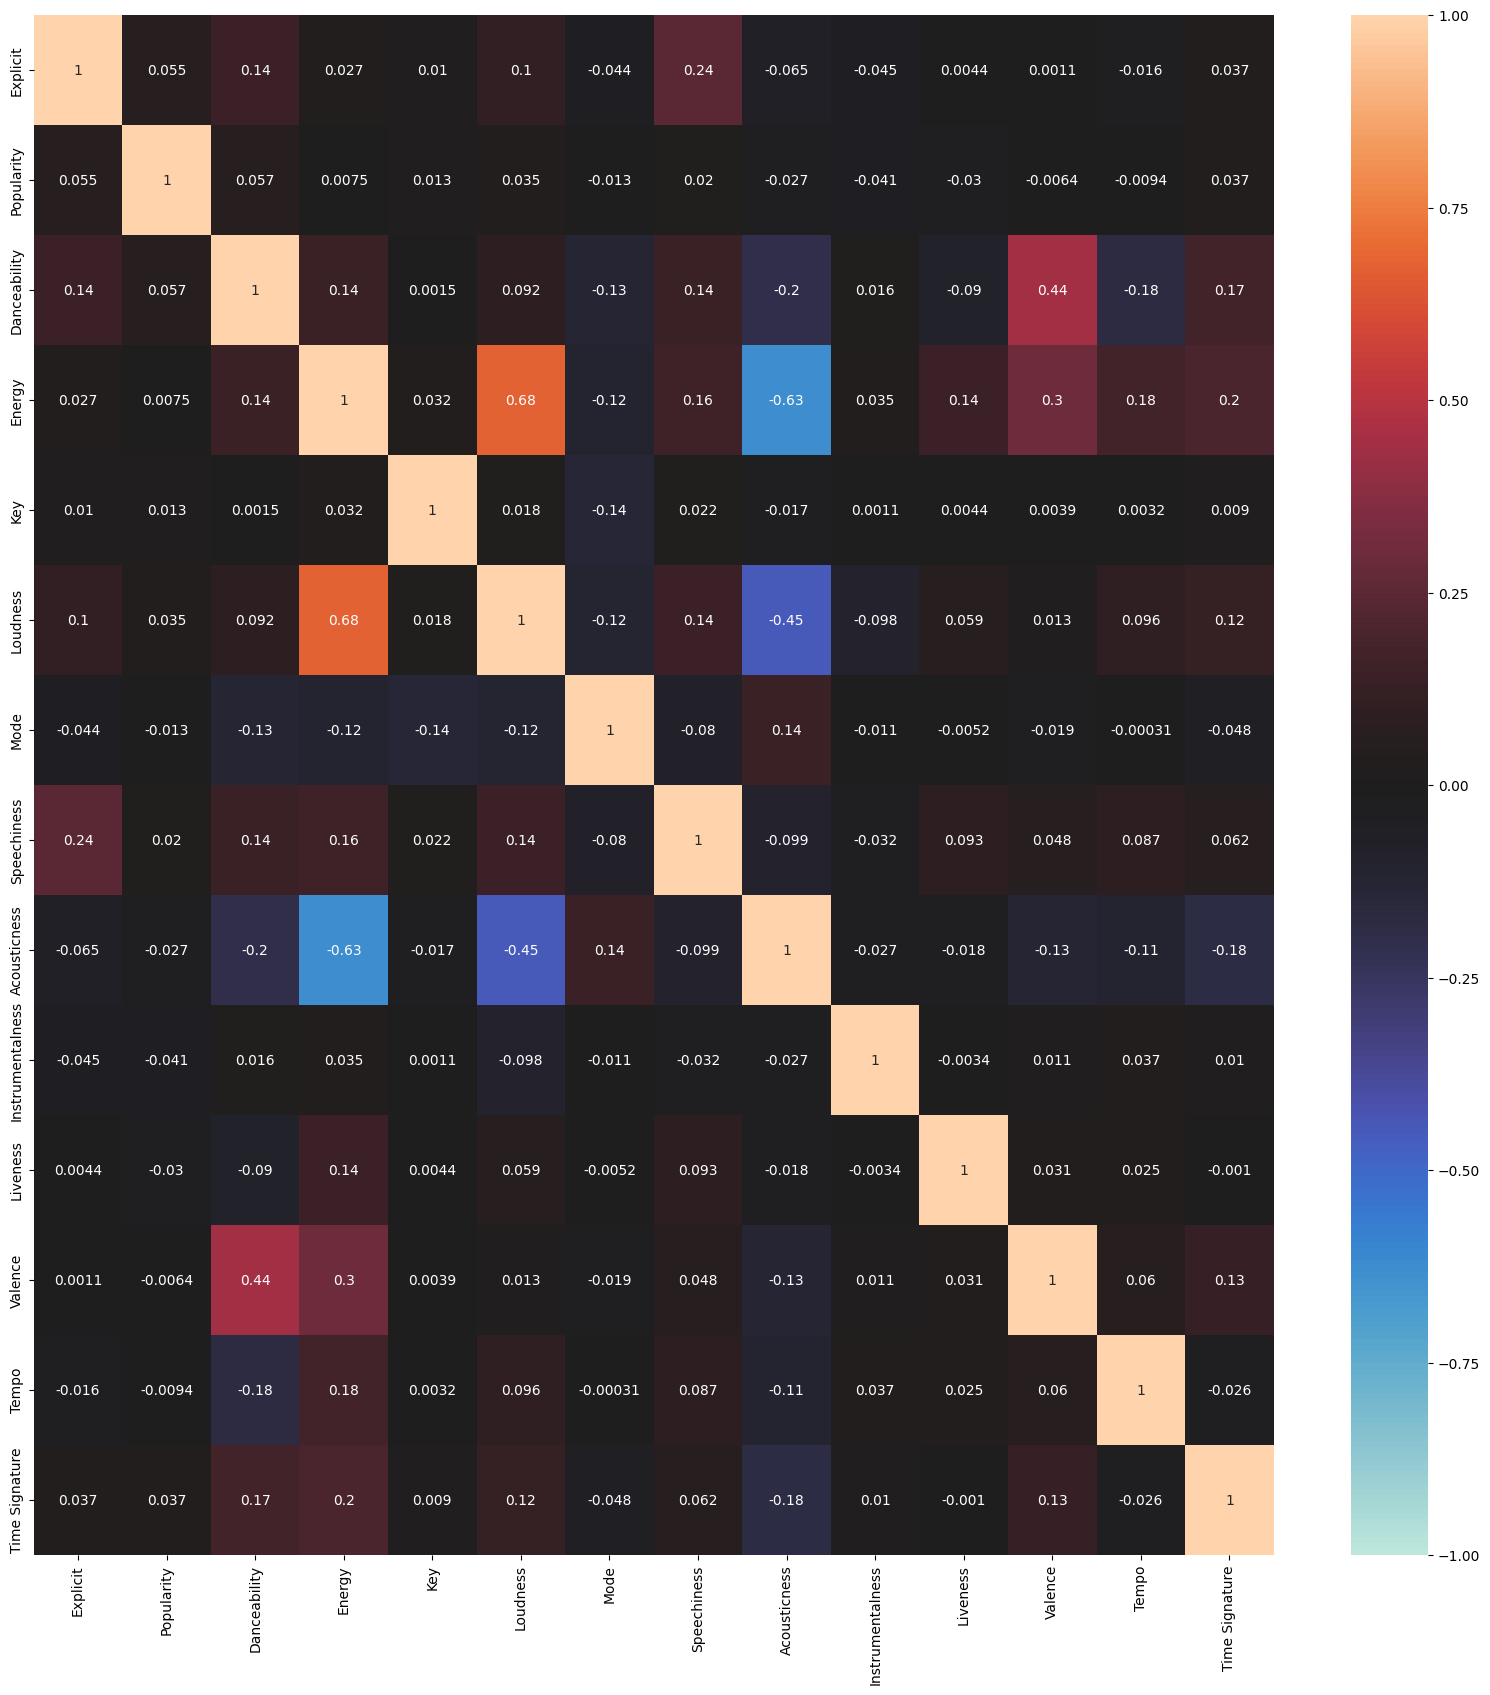

In [23]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2g", vmin=-1, vmax=1, center= 0)

<Axes: xlabel='Popularity', ylabel='Count'>

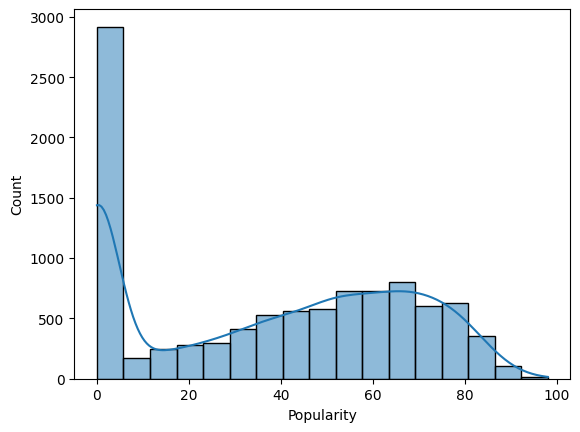

In [28]:
sns.histplot(df['Popularity'], kde=True)

<Figure size 3000x3000 with 0 Axes>

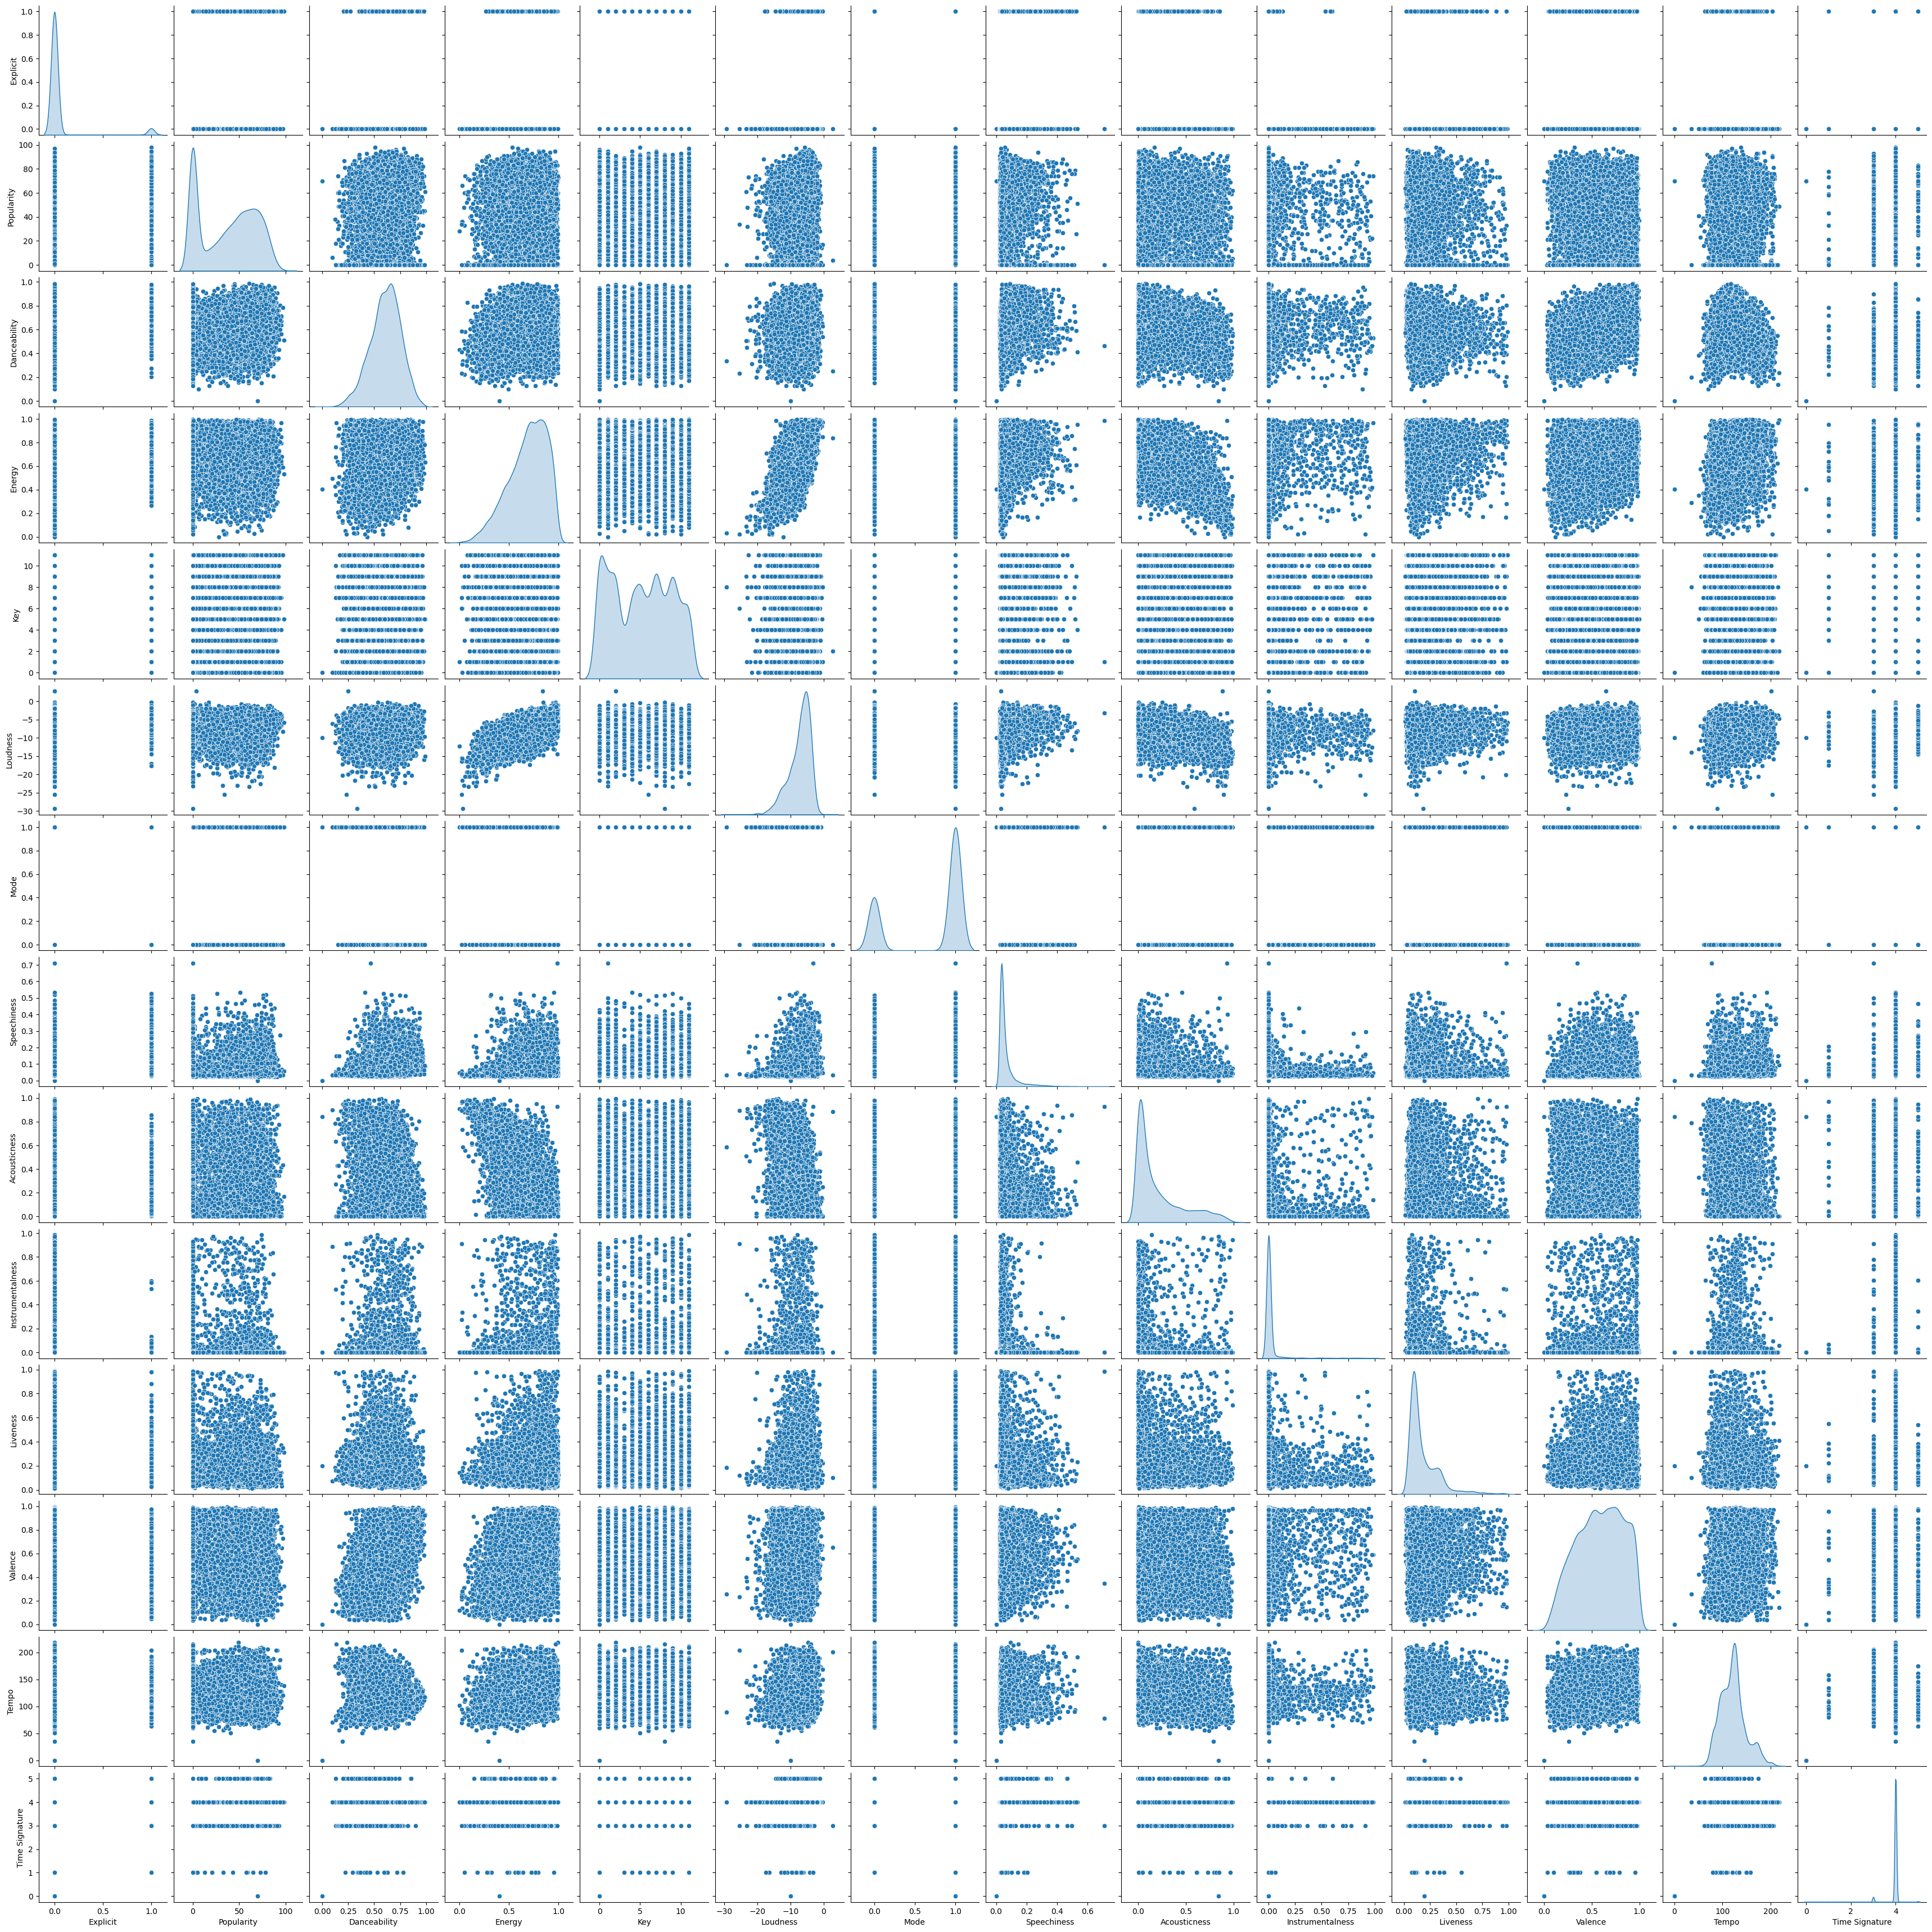

In [29]:
plt.figure(figsize=(30, 30))
sns.pairplot(df, diag_kind="kde")